# ***Sentiment Analysis Of Fake News:***

**Problem Statement**

Fake news is created to trigger strong emotions, contributing to misinformation and social polarization. While existing fake news detection models primarily focus on detecting fake vs. real news, analysing the sentiment behind fake news can reveal its psychological impact. This project will examine how the sentiment in fake news differs from that in real news.

## **Data Collection**
**Kaggle**: https://www.kaggle.com/code/midouazerty/detecting-fake-news-step-by-step/input?select=fake_or_real_news.csv

## **Dataset Information**

- **Rows: 20,800**
- **Columns: 5**


1. The **label** column is the most critical feature.
  - Real vs. Fake News

  - 1 (Real) → Represents genuine news articles.

  - 0 (Fake) → Represents misleading or false news articles.
The proportion of Fake vs. Real articles will help determine if your dataset is balanced.

2. **Title Column**

  - The title column captures the headline of the news, which could be useful for detecting misleading or exaggerated claims in fake news.

3. **Author Column**

  - The author column may indicate patterns (e.g., some authors may frequently write fake news).

4. **Text Column (News Content)**

  - The text column contains the full content of the news article.
Key for NLP analysis: You can analyze patterns, word choices, or sentiment to differentiate fake vs. real news.

# **Libraries Installation**

In [1]:
# Installation
!pip install catboost
!pip install textblob
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 33.2 MB/s eta 0:00:00


# **Importing Required Libraries**

In [2]:
#Import all libraries and modules

# Suppress warnings to improve readability
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Core libraries for data manipulation and analysis
import pandas as pd               # Data manipulation
import numpy as np                # Numerical operations

# Visualization libraries
import matplotlib.pyplot as plt    # Plotting
import seaborn as sns             # Enhanced plotting
import plotly.express as px       # Interactive visualization
from wordcloud import WordCloud   # Word cloud generation

# Utilities for working with text data
from collections import Counter   # Count word frequencies

# Scikit-learn modules for machine learning
from sklearn.model_selection import train_test_split # Split data into training and testing sets
from sklearn.feature_extraction.text import TfidfVectorizer # Convert text to numerical features
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score # Evaluate model performance
from sklearn.pipeline import make_pipeline # Streamline model building and preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier # Ensemble models
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC  # Support Vector Machine
from sklearn.neural_network import MLPClassifier  # Neural Network

# Additional machine learning libraries
#from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Library for sentiment analysis
from textblob import TextBlob

# Natural Language Toolkit (NLTK) for text processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re  # Regular expressions for text cleaning
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import wordnet
from wordcloud import STOPWORDS
from wordcloud import WordCloud
from pprint import pprint

import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from gensim.models import TfidfModel

import pyLDAvis.gensim_models
import pickle
import pyLDAvis


from matplotlib import pyplot as plt

## **Downloading NLTK resources**

In [3]:
# Download NLTK resources (stopwords, tokenization, and lemmatization models)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

## **Data Loading**

In [4]:
news_df = pd.read_csv("news.csv")
print("News DataFrame:")
# Display the first few rows of the dataset
news_df.head()

News DataFrame:


id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1

**Column Data Types**

In [5]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


**Number of Records and Columns**

In [6]:
news_df.shape

(20800, 5)

**Interpretation**

- Dataset has 20,800 rows and 5 columns, meaning:

- 20,800 news articles
5 attributes for each article (id, title, author, text, label)

**Label Column Distribution**

In [7]:
news_df['label'].value_counts(normalize=True) * 100

label
1    50.0625
0    49.9375
Name: proportion, dtype: float64

**Interpretation**
- 51.59% Fake News (label = 0)
- 48.41% Real News (label = 1)

## **Data Handling**

**Interpreting Your Data Cleaning Steps**

1. **Handling Missing Values**

- **Dropped rows** where 'title' or 'text' are missing → Ensures only complete articles remain.
- **Dropped rows** where 'id' is missing → Keeps data integrity since 'id' is a unique identifier.
- **Filled missing** 'author' values with 'Unknown' → Preserves all articles, even if the author is unavailable.
- **Filled missing** 'label' values with the most frequent label → Prevents data loss while maintaining label distribution.
- Identifying and Removing Duplicates

2. Found duplicate rows based on 'title' and 'text' → Helps check for repeated news articles.
3. **Dropped duplicates**, keeping the first occurrence → Ensures unique news articles remain.

**Why This is Important**
- Improves Data Quality: Removes inconsistencies and ensures a cleaner dataset.
Prepares Data for Analysis: Helps avoid misleading insights from duplicate entries.
- Prevents Bias in Model Training: Duplicate rows could skew results, especially in classification tasks.

In [8]:
news_df.dropna(subset=['title', 'text'], inplace=True)
news_df = news_df.dropna(subset=['id'])
news_df['author'].fillna('Unknown', inplace=True)
news_df['label'] = news_df['label'].fillna(news_df['label'].mode()[0])  # Fill with the most frequent value

<ipython-input-8-40438b4887b8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  news_df['author'].fillna('Unknown', inplace=True)


In [9]:
duplicate_rows = news_df[news_df.duplicated(subset=['title', 'text'], keep=False)]

# Display duplicate rows
print("Duplicate Rows based on 'title' and 'text':")
duplicate_rows


Duplicate Rows based on 'title' and 'text':


id                                              title  \
159      159                     What the Clintons Did to Haiti   
347      347                                 LesserOfTwoEvilism   
367      367     Fighting Ghost Fascists While Aiding Real Ones   
376      376  Realities Faced by Black Canadians are a Natio...   
443      443         What Does a Trump Victory Mean for Africa?   
...      ...                                                ...   
20632  20632  Social Justice Attorney Andrea Burton: Jailed ...   
20652  20652  Jeddah airport was targeted by Ansar Allah mis...   
20728  20728  Trump warns of World War III if Clinton is ele...   
20749  20749  Realities Faced by Black Canadians are a Natio...   
20754  20754                     No More American Thanksgivings   

                   author                                               text  \
159    Nathan J. Robinson  Tweet Widget by Nathan J. Robinson \nBill and ...   
347             Anonymous  2016 presidential campaign by Matt Sedillo \nH...   
367             Glen Ford  2016 presidential campaign by BAR executive ed...   
376             Anonymous  Tweet Widget by Robyn Maynard \nCanada, includ...   
443          Patrick Bond  2016 elections by Patrick Bond \nDonald Trump ...   
...                   ...                                                ...   
20632        Bill Quigley  Tweet Widget by Bill Quigley \nA young Black l...   
20652             Unknown  Email \n\nAn informed source in Yemen's AnsarA...   
20728             Unknown  Email Donald Trump warned in an interview Tues...   
20749           Anonymous  Tweet Widget by Robyn Maynard \nCanada, includ...   
20754           Glen Ford  Thanksgiving by Glen Ford \n“The core ideologi...   

       label  
159        1  
347        1  
367        1  
376        1  
443        1  
...      ...  
20632      1  
20652      1  
20728      1  
20749      1  
20754      1  

[140 rows x 5 columns]

In [10]:
duplicate_counts = news_df.duplicated(subset=['title', 'text']).sum()
print(f"Number of duplicate entries based on 'title' and 'text': {duplicate_counts}")

Number of duplicate entries based on 'title' and 'text': 70


In [11]:
# Drop duplicate rows based on 'title' and 'text
news_df.drop_duplicates(subset=['title', 'text'], keep='first', inplace=True)

In [12]:
news_df.shape

(20133, 5)

In [13]:
news_df.head()

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1

**Summary statistics for the News data**

In [14]:
print("Summary statistics for the News data:")
print(news_df.describe(include='all'))

Summary statistics for the News data:
                  id                                              title  \
count   20133.000000                                              20133   
unique           NaN                                              19764   
top              NaN  The Dark Agenda Behind Globalism And Open Borders   
freq             NaN                                                  5   
mean    10389.206626                                                NaN   
std      6001.327138                                                NaN   
min         0.000000                                                NaN   
25%      5197.000000                                                NaN   
50%     10393.000000                                                NaN   
75%     15576.000000                                                NaN   
max     20799.000000                                                NaN   

         author   text         label  
count     20133  20133

# **Data Visualization after Data Cleaning**

- **Visualizing label(Fake, Real) distribution**

<ipython-input-15-da7025a17600>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='label',data = news_df,palette="Paired")


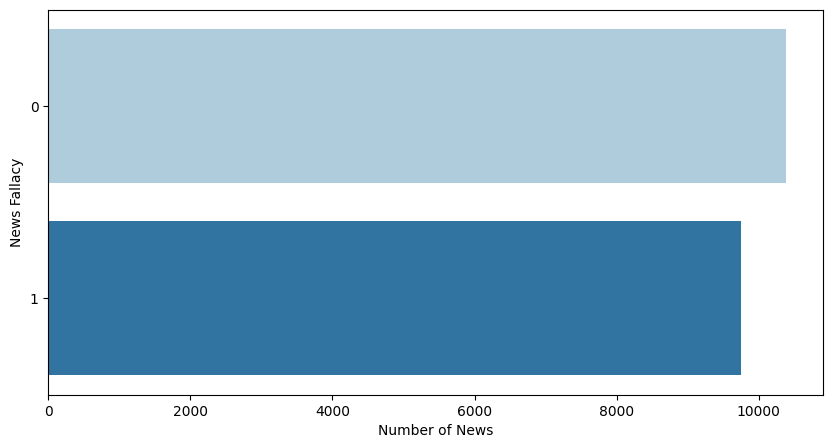

In [15]:
#Visualizing label distribution
plt.figure(figsize=(10,5))
sns.countplot(y='label',data = news_df,palette="Paired")
plt.ylabel("News Fallacy")
plt.xlabel("Number of News")
plt.show()

In [16]:
# Donut chart
fig = px.pie(news_df, names='label', title='Distribution of Fake vs. Real News',
             hole=0.3, color_discrete_sequence=px.colors.sequential.Viridis)
fig.show()

**The key takeaways from the graph are:**

Balanced Dataset:

- The two bars are nearly equal in length, indicating that the dataset contains a relatively balanced distribution of real and fake news articles.
The proportions suggest that fake news slightly outnumbers real news, with fake news making up around 51.6% and real news around 48.4% of the total dataset.

In [17]:
# word_count
news_df['word_count'] = news_df['text'].apply(lambda x: len(str(x).split()))
news_df['word_count'] = news_df['text'].apply(lambda x: len(str(x).split()))

# unique_word_count
news_df['unique_word_count'] = news_df['text'].apply(lambda x: len(set(str(x).split())))
news_df['unique_word_count'] = news_df['text'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
news_df['stop_word_count'] = news_df['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
news_df['stop_word_count'] = news_df['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

# url_count
news_df['url_count'] = news_df['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
news_df['url_count'] = news_df['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# mean_word_length
news_df['mean_word_length'] = news_df['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
news_df['mean_word_length'] = news_df['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
news_df['char_count'] = news_df['text'].apply(lambda x: len(str(x)))
news_df['char_count'] = news_df['text'].apply(lambda x: len(str(x)))


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



<ipython-input-18-7972c8ab9a2e>:13: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-18-7972c8ab9a2e>:14: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-18-7972c8ab9a2e>:13: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use

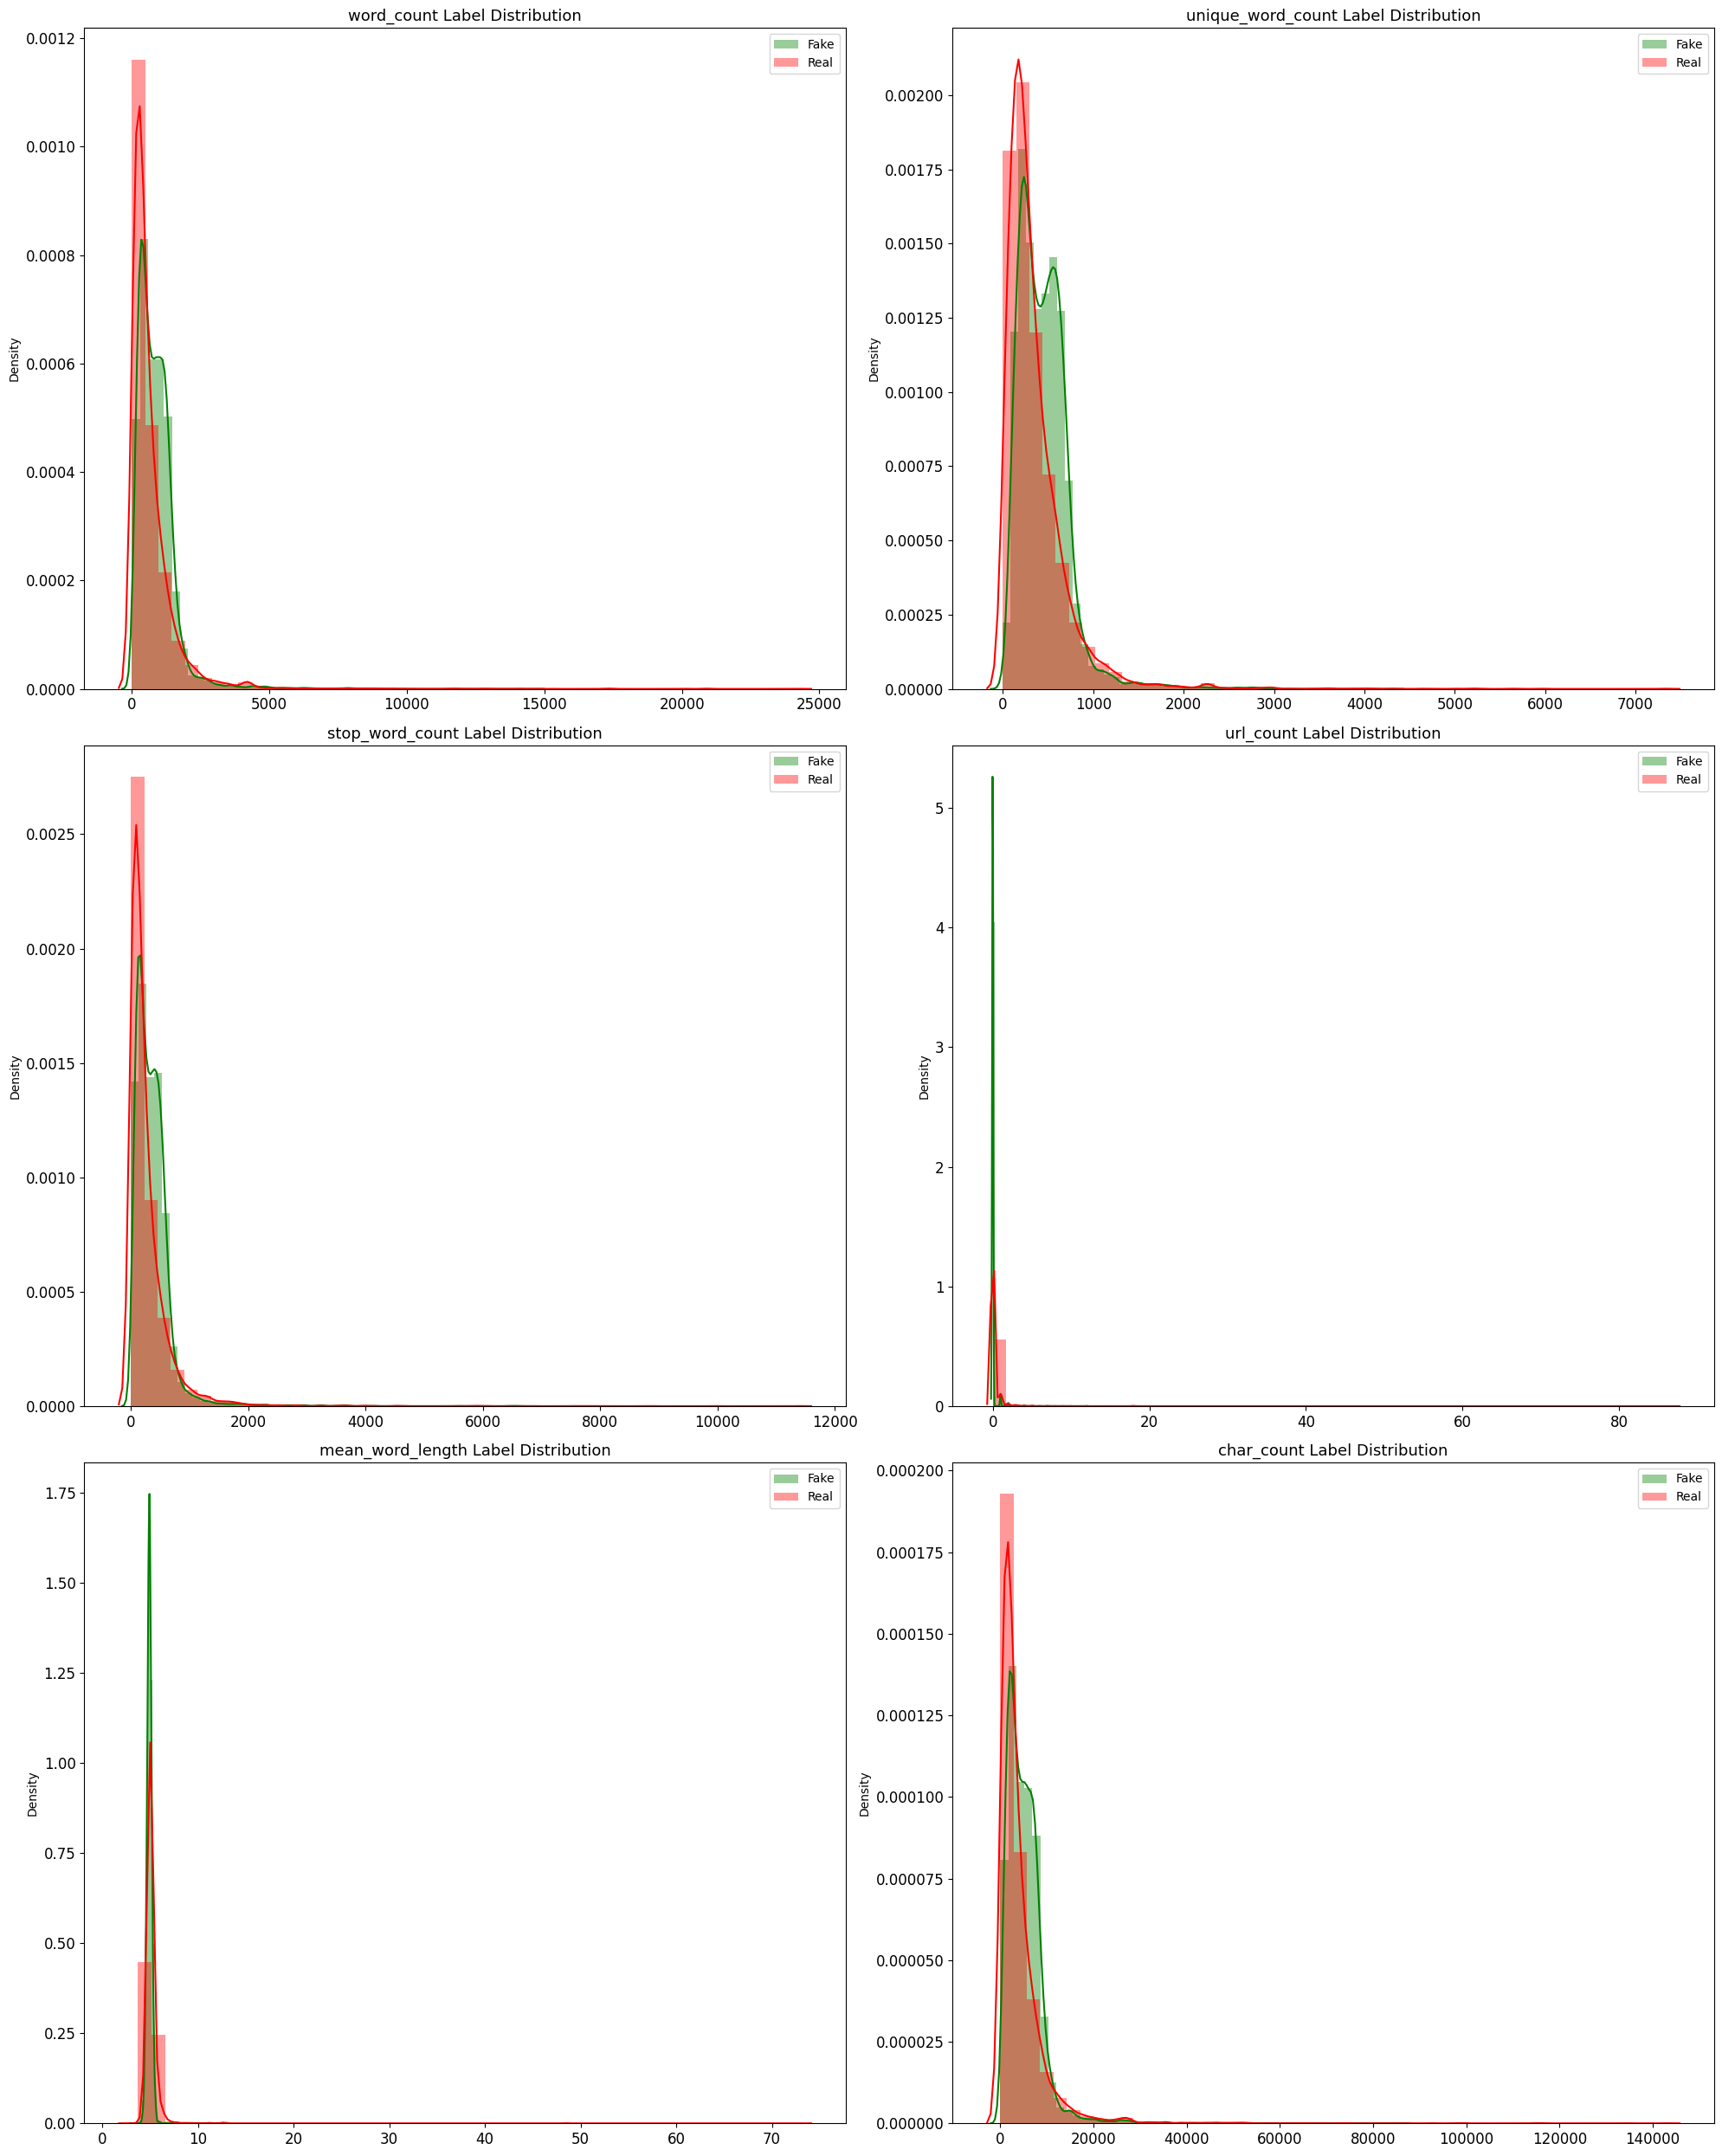

In [18]:
METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count', 'url_count', 'mean_word_length',
                'char_count']
Real_News = news_df['label'] == 1

# Adjust number of rows to accommodate 2 columns
ncols = 2
nrows = (len(METAFEATURES) + 1) // ncols  # Ensures all features fit

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 25), dpi=100)
axes = axes.flatten()  # Flatten the axes array for easy indexing

for i, feature in enumerate(METAFEATURES):
    sns.distplot(news_df.loc[~Real_News][feature], label='Fake', ax=axes[i], color='green')
    sns.distplot(news_df.loc[Real_News][feature], label='Real', ax=axes[i], color='red')

    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)
    axes[i].legend()
    axes[i].set_title(f'{feature} Label Distribution', fontsize=13)

# Hide any unused subplot spaces (if odd number of features)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Interpretation of the Density Plots**
- These density plots compare different text-based features for fake news (green) vs. real news (red). Each subplot represents the distribution of a specific feature.

**Key Observations for Each Feature:**

**Word Count (Top-left plot):**

- The distribution is right-skewed, meaning most articles have a lower word count, with some long-form articles as outliers.
Fake and real news articles have a similar word count distribution, but fake news seems to have slightly more outliers with higher word counts.

**Unique Word Count (Top-right plot)**

- Similar to word count, fake and real news have overlapping distributions.
Fake news articles appear to have slightly fewer unique words on average compared to real news.

**Stop Word Count (Middle-left plot)**

- Both fake and real news articles have comparable distributions, indicating they contain a similar number of stop words (common words like "the," "is," "and").
There isn’t a clear distinction between the two, meaning stop word usage alone may not be a strong distinguishing factor.

**URL Count (Middle-right plot)**

- The density is very high near zero, meaning most articles contain few or no URLs.
However, fake news seems to have slightly more articles with multiple URLs, suggesting fake news articles may reference external sources more frequently.

**Mean Word Length (Bottom-left plot)**

- Both classes have a peak around 4-6 characters per word, indicating similar vocabulary usage.
There are some fake news articles with longer words on average, but the difference is minimal.

**Character Count (Bottom-right plot)**

- Like the word count, the character count distribution is right-skewed.
Fake and real news have similar distributions, but fake news may have slightly more extreme values (longer articles).
Overall Insight

# **Data Preprocessing**

## **Text Normalization**

In [19]:
# Tokenization function
def tokenizer(description):
    description = str(description).lower()
    description = re.sub(r'[^a-zA-Z0-9]', ' ', description)  # Remove special characters
    tokenizer = RegexpTokenizer(r'\w+|\$[\d\.]+|\S+')  # Use raw string
    words = tokenizer.tokenize(description)
    return ' '.join(words)

# Stopword removal function
def remove_stopwords(words):
    tokens = words.split()
    stop_words = set(stopwords.words('english'))  # Convert to a set for fast lookup
    filtered_words = ' '.join([w for w in tokens if w not in stop_words])
    return filtered_words

# Get part of speech tags
def get_part_of_speech_tags(token):
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    tag = nltk.pos_tag([token])[0][1][0].upper()
    return tag_dict.get(tag, wordnet.NOUN)

# Lemmatization function
def postag_lemmentization(words):
    lemmatizer = WordNetLemmatizer()
    token_list = words.split()
    lemmatized_words = ' '.join([lemmatizer.lemmatize(token, get_part_of_speech_tags(token)) for token in token_list])
    return lemmatized_words

# Full preprocessing pipeline
def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keep only letters and spaces

    # Apply tokenization, stopword removal, and lemmatization
    text = tokenizer(text)
    text = remove_stopwords(text)
    text = postag_lemmentization(text)
    return text


In [20]:
news_df['cleaned_text'] = news_df['text'].apply(preprocess_text)

In [21]:
news_df.head()

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  word_count  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1         820   
1  Ever get the feeling your life circles the rou...      0         710   
2  Why the Truth Might Get You Fired October 29, ...      1        1266   
3  Videos 15 Civilians Killed In Single US Airstr...      1         557   
4  Print \nAn Iranian woman has been sentenced to...      1         154   

   unique_word_count  stop_word_count  url_count  mean_word_length  \
0                432              356          0          5.001220   
1                417              310          0          4.836620   
2                659              536          0          5.059242   
3                277              236          0          4.788151   
4                102               59          0          5.071429   

   char_count                                       cleaned_text  
0        4930  house dem aide didnt even see comeys letter ja...  
1        4160  ever get feel life circle roundabout rather he...  
2        7692  truth might get fire october tension intellige...  
3        3237  video civilian kill single u airstrike identif...  
4         938  print iranian woman sentence six year prison i...

## **Data Exploration & Analysis (EDA)**

### **Word cloud Visualizations**

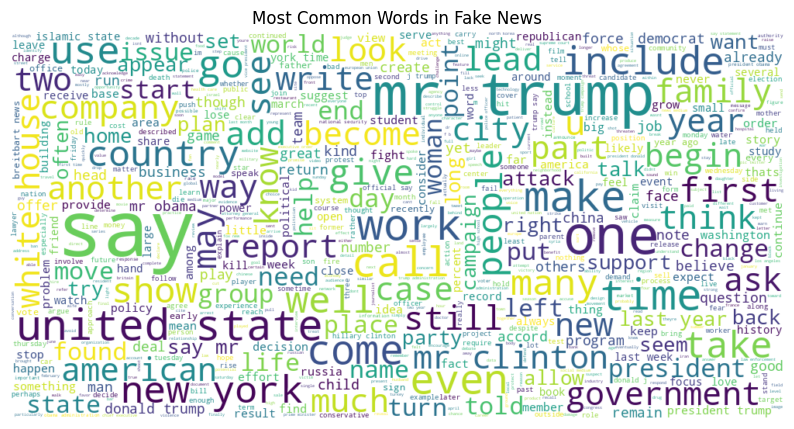

In [22]:
# word clouds for fake and real news

# Join the different processed comments together.
fake_news = ' '.join(news_df[news_df['label'] == 0]['cleaned_text'])
real_news = ' '.join(news_df[news_df['label'] == 1]['cleaned_text'])

# word cloud for fake news
fake_wordcloud = WordCloud(width=1000, height=500, max_font_size=100,max_words=1000,contour_width=0, contour_color='steelblue', background_color='white').generate(fake_news)
plt.figure(figsize=(10, 6))
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Most Common Words in Fake News')
plt.axis('off')
plt.show()


# **Analysis of Common Words in Fake News**

## Key Observations

### Most Frequent Words (Larger Font)
Words like "say," "one," "mr," "trump," "united," "state," "government," "include" appear prominently, indicating they are frequently used in fake news articles.

"Trump," "Clinton," "government," "report," "new york" suggest that political terms are dominant, which implies that fake news in your dataset is heavily related to politics.

### Common Themes
- **Politics**: The presence of words like "Trump," "Clinton," "government," "president," "country," "state," "democrat," "republican" suggests a significant portion of fake news revolves around political topics.
- **Sensational Language**: Words like "attack," "issue," "group," "support," "report," "call," "lead," "work" indicate a tendency to focus on controversial or attention-grabbing topics.
- **Entities and Locations**: Terms like "united states," "new york," "white house" suggest a focus on U.S. political events.

### Possible Implications
- Fake news articles tend to use authoritative or sensational language.
- Political figures and events are common subjects of misinformation.
- The language structure indicates a reporting-style format, using words like "say," "report," "show," "include" to mimic real journalism.



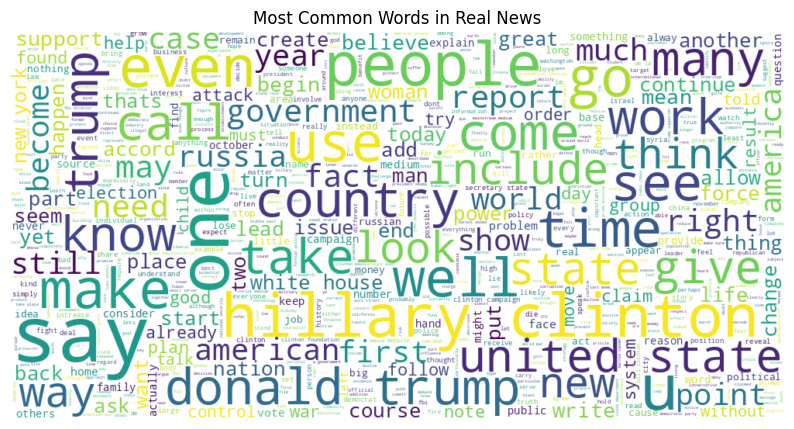

In [23]:
# word cloud for real news
real_wordcloud = WordCloud(width=1000, height=500, max_font_size=100,max_words=1000,contour_width=0, contour_color='steelblue', background_color='white').generate(real_news)
plt.figure(figsize=(10, 6))
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.title('Most Common Words in Real News')
plt.axis('off')
plt.show()

# **Analysis of Common Words in Real News**

## Key Observations  

## Most Frequent Words (Larger Font)  
Words like **"Donald Trump," "Hillary Clinton," "people," "government," "state," "country," "make," "use," "one"** appear prominently, indicating their frequent usage in real news articles.  

Political figures such as **"Trump" and "Clinton"** are dominant, reflecting a strong focus on U.S. politics in the dataset.  

## Common Themes  
- **Politics**: The presence of words like **"Trump," "Clinton," "government," "state," "united," "country," "Russia," "support"** suggests that real news articles extensively cover political topics, elections, and governance.  
- **Neutral and Informational Tone**: Words such as **"report," "include," "accord," "fact," "explain," "write," "power"** suggest that real news aims to present information rather than sensationalize.  
- **General News Coverage**: Terms like **"people," "world," "many," "work," "way," "right"** indicate discussions on societal and global issues beyond just politics.  

## Possible Implications  
- Real news articles frequently cover political figures and events, especially in the U.S.  
- The vocabulary suggests an emphasis on reporting facts and analysis rather than emotional or sensational language.  
- The language structure indicates an objective, informative approach, reinforcing credibility and trustworthiness.  

In [24]:
from collections import Counter

# Tokenize and count words in fake news
fake_news_words = re.findall(r'\b\w+\b', fake_news.lower())  # Tokenize and convert to lowercase
fake_news_counter = Counter(fake_news_words)

# Tokenize and count words in real news
real_news_words = re.findall(r'\b\w+\b', real_news.lower())  # Tokenize and convert to lowercase
real_news_counter = Counter(real_news_words)

# Now get the most common words
common_fake_words = fake_news_counter.most_common(20)
common_real_words = real_news_counter.most_common(20)

# Extract words and their counts for plotting
fake_words, fake_counts = zip(*common_fake_words)
real_words, real_counts = zip(*common_real_words)



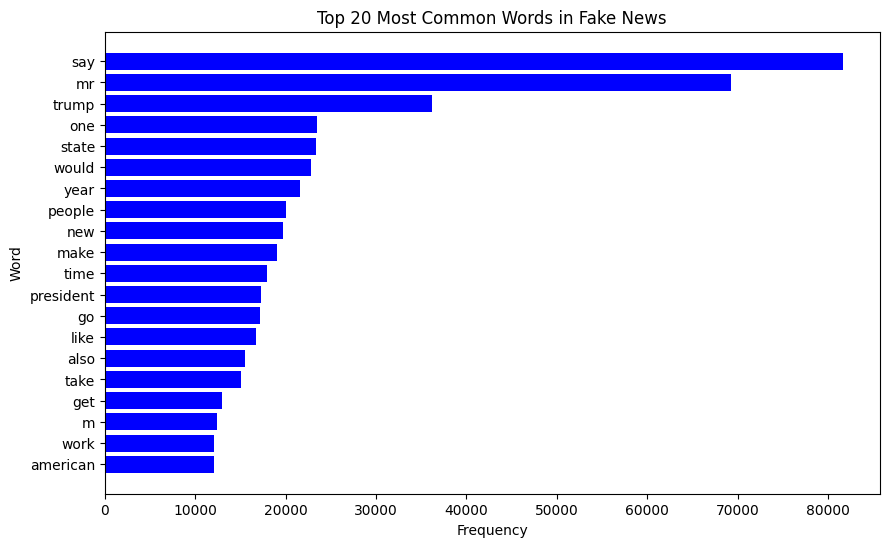

In [25]:
# Plot most common words in fake news
plt.figure(figsize=(10, 6))
plt.barh(fake_words, fake_counts, color='blue')
plt.title('Top 20 Most Common Words in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.gca().invert_yaxis()  # Invert y-axis to have most common words at the top
plt.show()


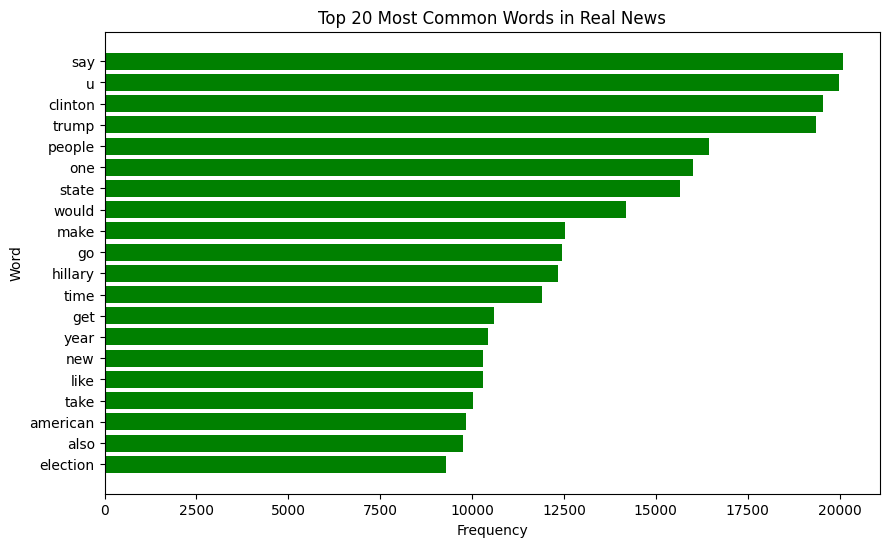

In [26]:
# Plot most common words in real news
plt.figure(figsize=(10, 6))
plt.barh(real_words, real_counts, color='green')
plt.title('Top 20 Most Common Words in Real News')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.gca().invert_yaxis()  # Invert y-axis to have most common words at the top
plt.show()

## **Topic Modelling**

In [27]:
def text_to_words(texts):
    return [[word for word in simple_preprocess(str(text), deacc=True)]
            for text in texts]

text = news_df.cleaned_text.values.tolist()
text_words = text_to_words(text)
print(text_words[0])

['house', 'dem', 'aide', 'didnt', 'even', 'see', 'comeys', 'letter', 'jason', 'chaffetz', 'tweet', 'darrell', 'lucus', 'october', 'subscribe', 'jason', 'chaffetz', 'stump', 'american', 'fork', 'utah', 'image', 'courtesy', 'michael', 'jolley', 'available', 'creative', 'commonsby', 'license', 'apology', 'keith', 'olbermann', 'doubt', 'bad', 'person', 'world', 'weekfbi', 'director', 'james', 'comey', 'accord', 'house', 'democratic', 'aide', 'look', 'like', 'also', 'know', 'secondworst', 'person', 'well', 'turn', 'comey', 'sent', 'nowinfamous', 'letter', 'announce', 'fbi', 'look', 'email', 'may', 'related', 'hillary', 'clinton', 'email', 'server', 'rank', 'democrat', 'relevant', 'committee', 'didnt', 'hear', 'comey', 'found', 'via', 'tweet', 'one', 'republican', 'committee', 'chairman', 'know', 'comey', 'notify', 'republican', 'chairman', 'democratic', 'rank', 'member', 'house', 'intelligence', 'judiciary', 'oversight', 'committee', 'agency', 'review', 'email', 'recently', 'discover', 'ord

## **Without TF-IDF Model**

In [28]:
# Create Dictionary
word_dict = corpora.Dictionary(text_words)
word_dict.filter_extremes(no_below=5, no_above=0.1, keep_n=2000)
# Create Corpus
texts = text_words
# Term Count Frequency
corpus_vec = [word_dict.doc2bow(text) for text in texts]

# View
print(corpus_vec[0])

[(0, 1), (1, 5), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 6), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 7), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 5), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 7), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 5), (54, 1), (55, 1), (56, 1), (57, 2), (58, 2), (59, 1), (60, 1), (61, 2), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 2), (68, 1), (69, 1), (70, 1), (71, 5), (72, 1), (73, 1), (74, 1), (75, 1), (76, 2)]


In [29]:
print(word_dict)

Dictionary<2000 unique tokens: ['advance', 'aide', 'anthony', 'apparently', 'available']...>


In [30]:
word_dict.token2id

{'advance': 0,
 'aide': 1,
 'anthony': 2,
 'apparently': 3,
 'available': 4,
 'basic': 5,
 'buy': 6,
 'carolina': 7,
 'chairman': 8,
 'christian': 9,
 'classify': 10,
 'click': 11,
 'colleague': 12,
 'college': 13,
 'comey': 14,
 'connect': 15,
 'contain': 16,
 'creative': 17,
 'desire': 18,
 'development': 19,
 'discover': 20,
 'district': 21,
 'doubt': 22,
 'entire': 23,
 'existence': 24,
 'explosive': 25,
 'fbi': 26,
 'gop': 27,
 'graduate': 28,
 'grant': 29,
 'hear': 30,
 'hot': 31,
 'image': 32,
 'inform': 33,
 'intelligence': 34,
 'james': 35,
 'journalist': 36,
 'leadership': 37,
 'letter': 38,
 'liberal': 39,
 'license': 40,
 'light': 41,
 'machine': 42,
 'marriage': 43,
 'michael': 44,
 'model': 45,
 'moreover': 46,
 'neither': 47,
 'notice': 48,
 'politically': 49,
 'possibly': 50,
 'potentially': 51,
 'punish': 52,
 'rank': 53,
 'realize': 54,
 'reform': 55,
 'related': 56,
 'relevant': 57,
 'religious': 58,
 'reopen': 59,
 'responsibility': 60,
 'review': 61,
 'scar': 62,
 

In [31]:
# number of topics
num_topics = 30
# Build LDA model
lda_model = gensim.models.LdaModel(corpus=corpus_vec, id2word=word_dict, num_topics=num_topics, iterations=20)
# Print the Keyword in the 30 topics
pprint(lda_model.print_topics(num_words=20))

[(15,
  '0.051*"israel" + 0.030*"iran" + 0.022*"israeli" + 0.021*"iraq" + '
  '0.017*"jewish" + 0.016*"refugee" + 0.013*"jew" + 0.012*"peace" + '
  '0.011*"iraqi" + 0.010*"east" + 0.009*"council" + 0.009*"resolution" + '
  '0.009*"ban" + 0.008*"ambassador" + 0.008*"settlement" + 0.008*"west" + '
  '0.007*"invasion" + 0.007*"middle" + 0.007*"minister" + 0.006*"arab"'),
 (23,
  '0.026*"muslim" + 0.026*"islamic" + 0.025*"syria" + 0.022*"putin" + '
  '0.022*"saudi" + 0.017*"terrorist" + 0.014*"turkey" + 0.012*"western" + '
  '0.012*"isi" + 0.010*"terrorism" + 0.010*"nato" + 0.010*"arabia" + '
  '0.009*"syrian" + 0.008*"islam" + 0.008*"ukraine" + 0.007*"vladimir" + '
  '0.006*"moscow" + 0.006*"relation" + 0.006*"iraq" + 0.005*"conflict"'),
 (0,
  '0.035*"drug" + 0.016*"google" + 0.015*"arrest" + 0.015*"prison" + '
  '0.013*"gang" + 0.013*"murder" + 0.012*"victim" + 0.012*"criminal" + '
  '0.012*"sentence" + 0.011*"user" + 0.009*"apple" + 0.009*"data" + '
  '0.009*"abuse" + 0.007*"jail" + 0.

## **TF-IDF Model**

In [32]:
# Create Dictionary
dict_word = corpora.Dictionary(text_words)
dict_word.filter_extremes(no_below=5, no_above=0.1, keep_n=2000)
# Create Corpus
texts = text_words
# Term Count Frequency
corpus_vec = [dict_word.doc2bow(text) for text in texts]

model = TfidfModel(corpus=corpus_vec, id2word=dict_word)  # fit model
corpus_tfidf = [model[c] for c in corpus_vec]  # apply model to corpus document

# View
print(corpus_tfidf[0])

[(0, 0.0547227978757576), (1, 0.2686130463364868), (2, 0.06419142517538524), (3, 0.10551598698387993), (4, 0.04719733626202233), (5, 0.05814308704879203), (6, 0.05171875546651473), (7, 0.05801313282904303), (8, 0.2814044253163838), (9, 0.1131228411749891), (10, 0.0630770149276507), (11, 0.05764985683824443), (12, 0.05628438663385299), (13, 0.046049934384719195), (14, 0.4263432599131356), (15, 0.1101374114186977), (16, 0.055216327600893976), (17, 0.06850072721988452), (18, 0.057314406404594814), (19, 0.04734142718682113), (20, 0.0502203298320255), (21, 0.05072080681671511), (22, 0.049032471372191376), (23, 0.042852030253635744), (24, 0.06443492999723868), (25, 0.14095622282241638), (26, 0.24730242124923738), (27, 0.06627041883377881), (28, 0.060805362851939986), (29, 0.05345139664631979), (30, 0.05074982260770198), (31, 0.06392129544508394), (32, 0.04430454268448789), (33, 0.05656142058749455), (34, 0.045982651072230325), (35, 0.0449807621591642), (36, 0.04856261311080908), (37, 0.05176

In [33]:
# number of topics
num_topics = 30
# Build LDA model
lda_model = gensim.models.LdaModel(corpus=corpus_tfidf, id2word=dict_word, num_topics=num_topics, iterations=20)
# Print the Keyword in the 30 topics
pprint(lda_model.print_topics(num_words=20))

[(26,
  '0.006*"game" + 0.004*"season" + 0.004*"player" + 0.004*"father" + '
  '0.004*"shot" + 0.003*"restaurant" + 0.003*"sport" + 0.003*"room" + '
  '0.003*"car" + 0.003*"green" + 0.003*"saturday" + 0.003*"shoot" + '
  '0.003*"son" + 0.002*"star" + 0.002*"fan" + 0.002*"williams" + 0.002*"park" '
  '+ 0.002*"walk" + 0.002*"minute" + 0.002*"trip"'),
 (6,
  '0.005*"google" + 0.005*"user" + 0.004*"editor" + 0.004*"site" + '
  '0.004*"page" + 0.003*"reader" + 0.003*"product" + 0.003*"internet" + '
  '0.003*"piece" + 0.003*"ad" + 0.003*"content" + 0.003*"tool" + 0.003*"isnt" '
  '+ 0.003*"audience" + 0.003*"online" + 0.003*"outlet" + 0.003*"website" + '
  '0.003*"journal" + 0.002*"tv" + 0.002*"couldnt"'),
 (20,
  '0.173*"johnson" + 0.009*"smith" + 0.007*"testimony" + 0.006*"award" + '
  '0.006*"paris" + 0.006*"lawsuit" + 0.006*"commission" + 0.005*"storm" + '
  '0.005*"st" + 0.005*"cnn" + 0.005*"moderate" + 0.005*"flood" + '
  '0.005*"pennsylvania" + 0.005*"california" + 0.004*"development

In [34]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus_tfidf, dict_word)
pyLDAvis.display(LDAvis_prepared)

In [35]:
lda_model.show_topic(0, topn=30)

[('muslim', 0.02902215),
 ('migrant', 0.028716808),
 ('christian', 0.023984287),
 ('european', 0.015803536),
 ('europe', 0.013814943),
 ('german', 0.013526387),
 ('islamic', 0.0129442),
 ('religious', 0.012513369),
 ('islam', 0.01162477),
 ('refugee', 0.01152816),
 ('jew', 0.011097599),
 ('germany', 0.010845425),
 ('religion', 0.009720089),
 ('church', 0.009044347),
 ('france', 0.009019384),
 ('jewish', 0.008734088),
 ('faith', 0.0076921624),
 ('society', 0.0076067033),
 ('violence', 0.0074780006),
 ('minister', 0.007463492),
 ('ban', 0.00719269),
 ('britain', 0.006481195),
 ('mass', 0.0064660376),
 ('union', 0.006224043),
 ('crisis', 0.006084085),
 ('freedom', 0.0060493043),
 ('turkey', 0.005703478),
 ('revolution', 0.0055375127),
 ('prime', 0.005341155),
 ('promote', 0.005144543)]

In [36]:
# Generate a word cloud image for given topic
def draw_word_cloud(n):
    topic_words = dict(lda_model.show_topic(n, topn=50))
    wordcloud = WordCloud(background_color="white", contour_width=3, contour_color='steelblue')
    # Generate a word cloud
    wordcloud.generate_from_frequencies(topic_words)
    # Visualize the word cloud
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [37]:
dict(lda_model.show_topic(0, topn=50))

{'muslim': 0.02902215,
 'migrant': 0.028716808,
 'christian': 0.023984287,
 'european': 0.015803536,
 'europe': 0.013814943,
 'german': 0.013526387,
 'islamic': 0.0129442,
 'religious': 0.012513369,
 'islam': 0.01162477,
 'refugee': 0.01152816,
 'jew': 0.011097599,
 'germany': 0.010845425,
 'religion': 0.009720089,
 'church': 0.009044347,
 'france': 0.009019384,
 'jewish': 0.008734088,
 'faith': 0.0076921624,
 'society': 0.0076067033,
 'violence': 0.0074780006,
 'minister': 0.007463492,
 'ban': 0.00719269,
 'britain': 0.006481195,
 'mass': 0.0064660376,
 'union': 0.006224043,
 'crisis': 0.006084085,
 'freedom': 0.0060493043,
 'turkey': 0.005703478,
 'revolution': 0.0055375127,
 'prime': 0.005341155,
 'promote': 0.005144543,
 'hate': 0.005068236,
 'italy': 0.00498396,
 'dr': 0.0048579844,
 'oppose': 0.004655931,
 'camp': 0.0042932546,
 'immediately': 0.0042506666,
 'western': 0.004214391,
 'reserve': 0.0042081634,
 'section': 0.0041704252,
 'david': 0.0041461242,
 'london': 0.0041168863

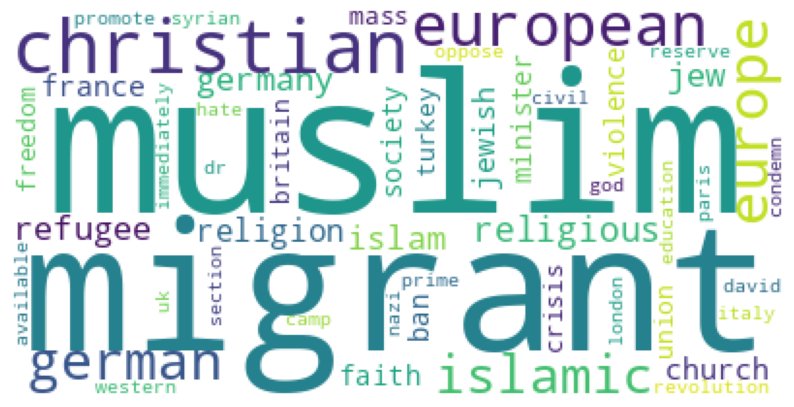

In [38]:
draw_word_cloud(0)

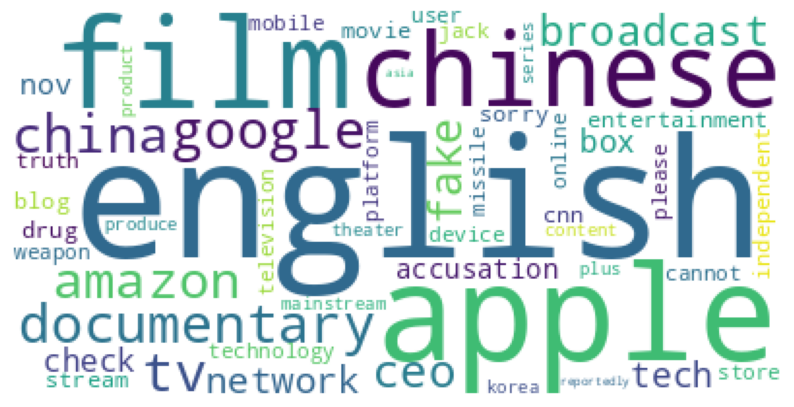

In [39]:
draw_word_cloud(1)

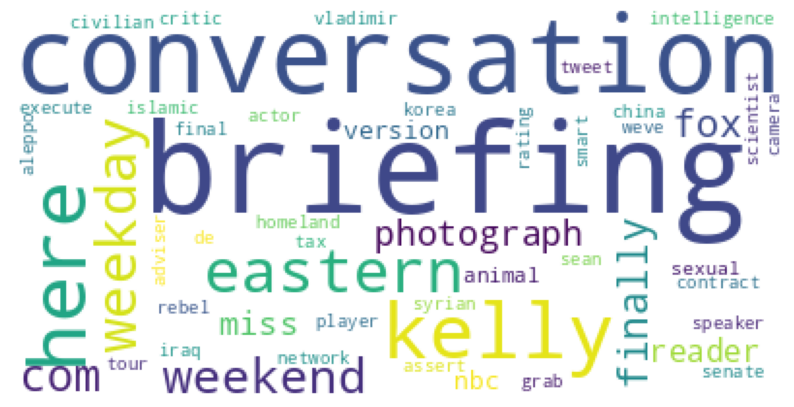

In [40]:
draw_word_cloud(3)

## **Sentiment Analysis**

In [41]:
# Function to get sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis to news text
news_df['text_sentiment'] = news_df['text'].apply(get_sentiment)

In [42]:
news_df.head()

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  word_count  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1         820   
1  Ever get the feeling your life circles the rou...      0         710   
2  Why the Truth Might Get You Fired October 29, ...      1        1266   
3  Videos 15 Civilians Killed In Single US Airstr...      1         557   
4  Print \nAn Iranian woman has been sentenced to...      1         154   

   unique_word_count  stop_word_count  url_count  mean_word_length  \
0                432              356          0          5.001220   
1                417              310          0          4.836620   
2                659              536          0          5.059242   
3                277              236          0          4.788151   
4                102               59          0          5.071429   

   char_count                                       cleaned_text  \
0        4930  house dem aide didnt even see comeys letter ja...   
1        4160  ever get feel life circle roundabout rather he...   
2        7692  truth might get fire october tension intellige...   
3        3237  video civilian kill single u airstrike identif...   
4         938  print iranian woman sentence six year prison i...   

   text_sentiment  
0        0.006777  
1        0.100880  
2        0.056258  
3        0.017497  
4       -0.012500

In [43]:
def classify_sentiment(polarity):
    if polarity >= 0.1:
        return 'positive'
    elif polarity <= -0.1:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment classification
news_df['sentiment_class'] = news_df['text_sentiment'].apply(classify_sentiment)

# Count the number of positive, negative, and neutral posts
sentiment_counts = news_df['sentiment_class'].value_counts()

# Display the counts
print(sentiment_counts)


sentiment_class
neutral     12773
positive     6798
negative      562
Name: count, dtype: int64


<ipython-input-44-ab42191fdd90>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-44-ab42191fdd90>:29: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



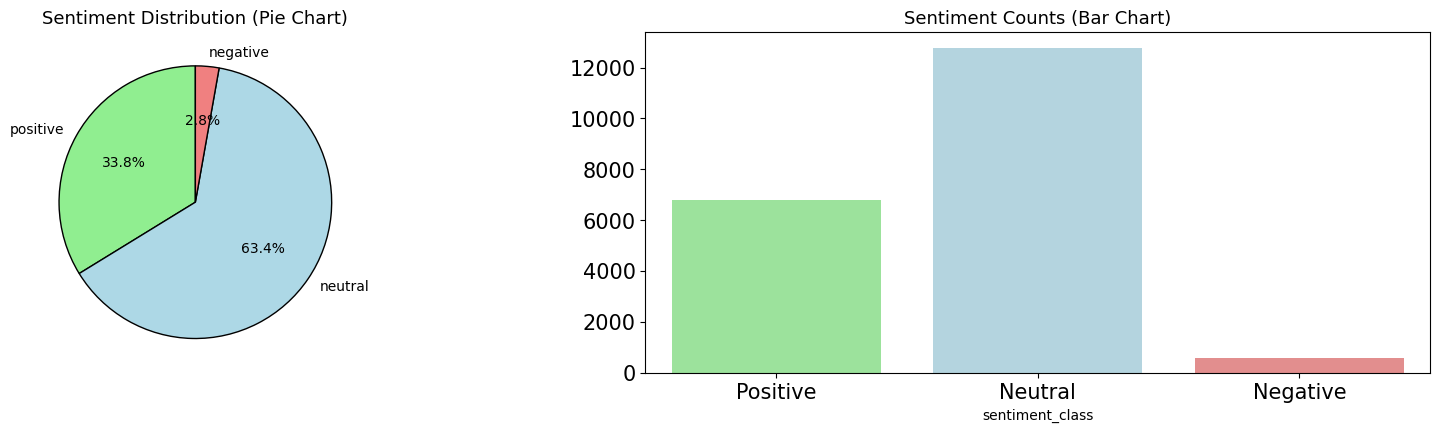

In [44]:
# Define the color palette for both pie and bar charts
colors = {'positive': 'lightgreen', 'neutral': 'lightblue', 'negative': 'lightcoral'}  # positive, neutral, negative

# Create subplots
fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
plt.tight_layout()

# Compute label counts and sort them in the desired order
label_counts = news_df['sentiment_class'].value_counts()
sorted_labels = ['positive', 'neutral', 'negative']  # Ensure order is correct for both charts
label_counts = label_counts[sorted_labels]

# **Pie Chart with Percentages**
label_counts.plot(
    kind='pie',
    ax=axes[0],
    autopct='%1.1f%%',  # Show percentage
    startangle=90,  # Rotate for better alignment
    colors=[colors[label] for label in label_counts.index],  # Use the defined colors
    wedgeprops={'edgecolor': 'black'}  # Add border for clarity
)

# **Count Plot**
sns.countplot(x='sentiment_class', data=news_df, ax=axes[1], palette=colors, order=sorted_labels)

# Formatting
axes[0].set_ylabel('')  # Remove default y-axis label from pie chart
axes[1].set_ylabel('')  # Remove default y-axis label from count plot
axes[1].set_xticklabels(['Positive', 'Neutral', 'Negative'], rotation=0)

# Adjust tick label size for clarity
for ax in axes:
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)

# Titles
axes[0].set_title('Sentiment Distribution (Pie Chart)', fontsize=13)
axes[1].set_title('Sentiment Counts (Bar Chart)', fontsize=13)

plt.show()

## **Summary statistics for text length**

In [45]:
# Calculate the length of each news article
news_df['text_length'] = news_df['text'].apply(len)

# Summary statistics for text length
print("\nSummary statistics for text length:")
print(news_df['text_length'].describe())


Summary statistics for text length:
count     20133.000000
mean       4663.903293
std        5146.364800
min           1.000000
25%        1747.000000
50%        3491.000000
75%        6363.000000
max      142961.000000
Name: text_length, dtype: float64


## **Distribution of Article Lengths**

In [46]:
# Histogram with Plotly Express
fig = px.histogram(news_df, x='text_length', nbins=50, title='Distribution of Article Lengths')
fig.update_layout(xaxis_title='Text Length', yaxis_title='Frequency')
fig.show()

In [47]:
import plotly.express as px

# Ensure you have a column for 'author' in your DataFrame (replace 'author' with the actual column name)
# Create a new column 'text_length' based on the length of 'text' column (if not done already)
news_df['text_length'] = news_df['text'].apply(len)

# Step 1: Count the number of articles each author has written
author_counts = news_df['author'].value_counts()

# Step 2: Filter authors with more than 100 articles
authors_with_more_than_5_articles = author_counts[author_counts > 100].index
filtered_news_df = news_df[news_df['author'].isin(authors_with_more_than_5_articles)]

# Step 3: Calculate average article length for each author
avg_article_length = filtered_news_df.groupby('author')['text_length'].mean().reset_index()

# Merge article counts with average article length
author_data = pd.DataFrame({
    'author': author_counts[authors_with_more_than_5_articles].index,
    'num_articles': author_counts[authors_with_more_than_5_articles].values
})

author_data = author_data.merge(avg_article_length, on='author')

# Step 4: Create Treemap
fig = px.treemap(
    author_data,
    path=['author'],  # Hierarchical structure of your treemap
    values='num_articles',
    color='text_length',  # Color by average article length
    hover_data=['num_articles', 'text_length'],
    color_continuous_scale='Viridis',  # Color scale for better representation
    title='Distribution of Articles by Author (More than 100 Articles)',
    labels={'num_articles': 'Number of Articles', 'text_length': 'Avg. Article Length'}
)

# Show the treemap
fig.show()


In [48]:
import plotly.express as px
import pandas as pd

# Step 1: Calculate the total number of articles by each author
author_article_counts = news_df['author'].value_counts().reset_index()
author_article_counts.columns = ['author', 'total_articles']

# Step 2: Filter fake news articles (label == 0)
fake_news_df = news_df[news_df['label'] == 0]

# Step 3: Count the number of fake news articles each author has written
author_fake_counts = fake_news_df['author'].value_counts().reset_index()
author_fake_counts.columns = ['author', 'fake_news_count']

# Step 4: Merge total articles and fake news counts
author_data = pd.merge(author_article_counts, author_fake_counts, on='author', how='left')
author_data['fake_news_count'] = author_data['fake_news_count'].fillna(0)

# Step 5: Filter authors who have written at least 50 fake news articles
author_data = author_data[author_data['fake_news_count'] >= 100]

# Step 6: Calculate the ratio of fake news articles to total articles for each author
author_data['fake_news_ratio'] = author_data['fake_news_count'] / author_data['total_articles']

# Step 7: Create a horizontal bar chart showing the fake news ratio by author
fig = px.bar(
    author_data,
    y='author',  # Author names on the y-axis
    x='fake_news_ratio',  # Fake news ratio on the x-axis
    labels={'y': 'Author', 'x': 'Fake News Ratio'},
    title='Fake News Ratio by Author (At least 100 Fake Articles)',
    color='fake_news_ratio',  # Color by the fake news ratio
    color_continuous_scale='Reds',  # Use a color scale for variation
)

# Show the bar chart
fig.show()

### **Interpretation of Fake News Ratio by Author Chart**

#### **Overview**
This bar chart visualizes the **Fake News Ratio by Author** for authors with at least **100 fake articles**.

#### **Key Observations**
1. **Nearly All Articles Are Fake**
   - The fake news ratio for all authors is **extremely close to 1** (almost 100% fake).
   - The color scale (dark red) confirms that all authors in this dataset have published nearly **exclusively fake news**.

2. **Top Authors with High Fake News Ratios**
   - **Trent Baker, Joel B. Pollak, AWR Hawkins, and Jeff Poor** have a **fake news ratio of almost 1**, meaning nearly all their articles are classified as fake.
   - **Pam Key** has the lowest fake news ratio but is still very close to 1.

3. **Breitbart News Appears in the List**
   - The presence of **Breitbart News** as an "author" suggests that this dataset might classify entire news outlets similarly to individual authors.

### **Conclusion**
This chart highlights **authors with high fake news content**. If this data is correct, these authors/outlets have been identified as publishing predominantly **fake news articles**.

Would you like to compare these findings with other sources or filter for authors with a mix of fake and real news? 🚀


In [49]:
import plotly.express as px

# Step 1: Count the number of real news articles each author has written
author_real_counts = news_df[news_df['label'] == 1]['author'].value_counts()

# Step 2: Filter authors who have written at least 50 real news articles
authors_with_50_or_more_real_articles = author_real_counts[author_real_counts >= 50]

# Step 3: Create a horizontal bar chart with more advanced styling
fig = px.bar(
    authors_with_50_or_more_real_articles,
    x=authors_with_50_or_more_real_articles.values,  # Number of articles
    y=authors_with_50_or_more_real_articles.index,  # Author names
    orientation='h',  # Horizontal bars
    title='Number of Real News Articles Written by Authors (At Least 50 Real News Articles)',
    labels={'x': 'Number of Real News Articles', 'y': 'Author'},
    color=authors_with_50_or_more_real_articles.values,  # Color by article count
    color_continuous_scale='Blues',  # Color scale for better visual distinction
    text=authors_with_50_or_more_real_articles.values,  # Display the number of articles on bars
    template='plotly_dark'  # Using dark theme for better contrast
)

# Step 4: Add customizations for better visualization
fig.update_traces(
    hovertemplate="Author: %{y}<br>Articles: %{x}<br>",
    textposition='inside',  # Place text labels inside the bars
    texttemplate='%{text}',  # Show the exact count of articles
)

# Step 5: Change background color to orange
fig.update_layout(
    title={'font': {'color': 'green'}},  # Set title color to green
    xaxis={
        'title': {'font': {'color': 'green'}},  # Set x-axis label color to green
        'tickfont': {'color': 'green'}  # Set x-axis tick values color to green
    },
    yaxis={
        'title': {'font': {'color': 'green'}},  # Set y-axis label color to green
        'tickfont': {'color': 'green'}  # Set y-axis tick values color to green
    },
    paper_bgcolor='peachpuff',  # Set the background color of the paper
    plot_bgcolor='peachpuff',   # Set the background color of the plot area
)


# Show the plot
fig.show()

## **Text Vectorization**

In [100]:
vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=5000)  # Captures unigrams + bigrams + trigrams
X = vectorizer.fit_transform(news_df['cleaned_text']).toarray()
y = news_df['label']

In [94]:
print("\nThe shape of the TF-IDF matrix is: ", X.shape)
print("\n The features are: ", vectorizer.get_feature_names_out())
print(X)


The shape of the TF-IDF matrix is:  (20133, 5000)

 The features are:  ['aaron' 'abandon' 'abc' ... 'zionist' 'zone' 'zu']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### 20133 Rows (Documents):
Each row represents a single document in your dataset. In this case, you have 20,133 news articles (or other text entries) that have been processed.

### 5000 Columns (Features/Terms):
Each column corresponds to a term (a word or phrase) that the TF-IDF vectorizer has identified as important from your text data. Since you set `max_features=5000`, the vectorizer keeps the top 5000 terms based on their TF-IDF scores.

## **Data Splitting**

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Data Modelling**

In [68]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0, random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42),
}

best_model = None
best_accuracy = 0

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy}')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model


Logistic Regression Accuracy: 0.9418922274646139
Random Forest Accuracy: 0.9222746461385647
Gradient Boosting Accuracy: 0.9200397318102806
Decision Tree Accuracy: 0.8708716165880308
CatBoost Accuracy: 0.9339458654084927
Neural Network Accuracy: 0.9351874844797616


## **Models Visualizations**

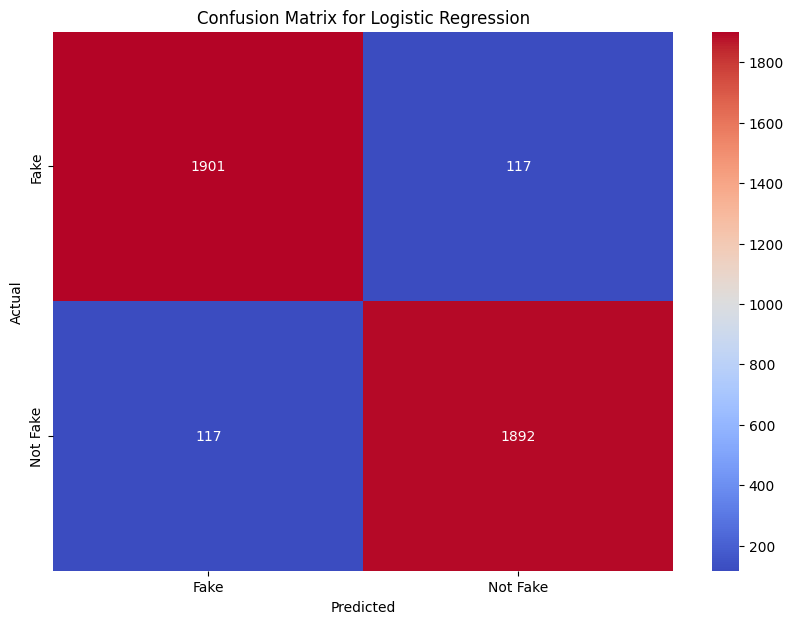

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

        Fake       0.94      0.94      0.94      2018
    Not Fake       0.94      0.94      0.94      2009

    accuracy                           0.94      4027
   macro avg       0.94      0.94      0.94      4027
weighted avg       0.94      0.94      0.94      4027


------------------------------------------------------------



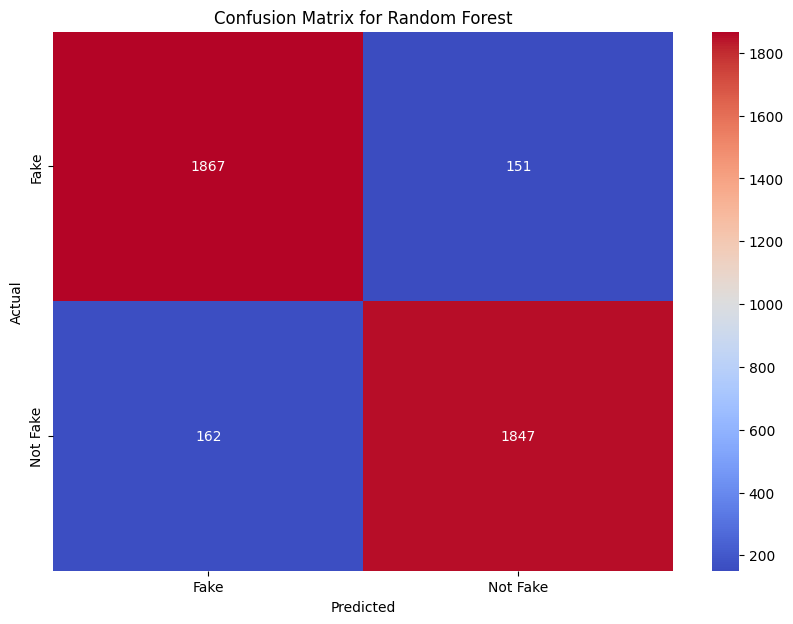

Classification Report for Random Forest:

              precision    recall  f1-score   support

        Fake       0.92      0.93      0.92      2018
    Not Fake       0.92      0.92      0.92      2009

    accuracy                           0.92      4027
   macro avg       0.92      0.92      0.92      4027
weighted avg       0.92      0.92      0.92      4027


------------------------------------------------------------



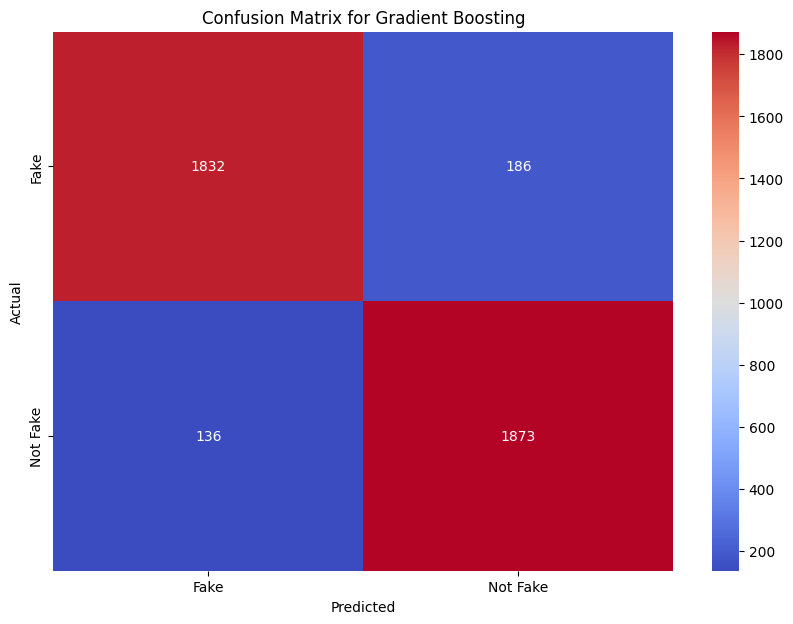

Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

        Fake       0.93      0.91      0.92      2018
    Not Fake       0.91      0.93      0.92      2009

    accuracy                           0.92      4027
   macro avg       0.92      0.92      0.92      4027
weighted avg       0.92      0.92      0.92      4027


------------------------------------------------------------



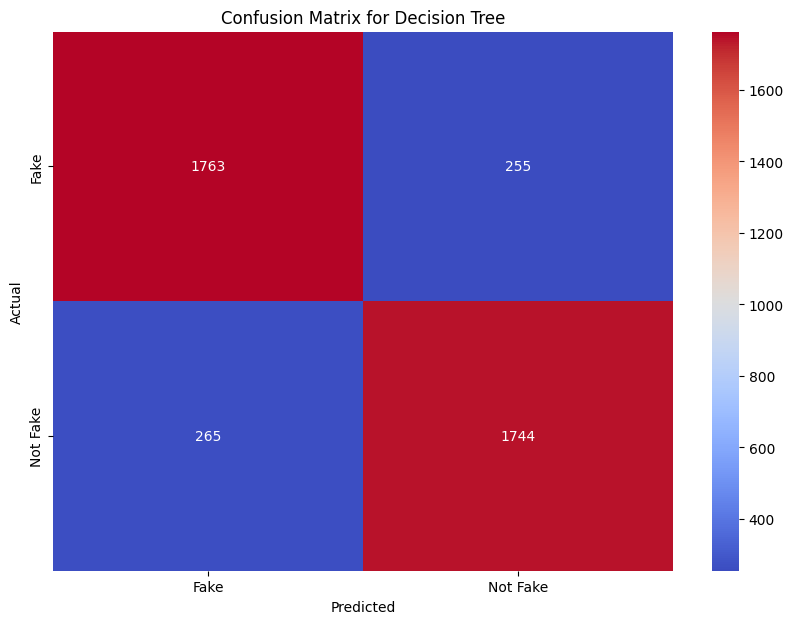

Classification Report for Decision Tree:

              precision    recall  f1-score   support

        Fake       0.87      0.87      0.87      2018
    Not Fake       0.87      0.87      0.87      2009

    accuracy                           0.87      4027
   macro avg       0.87      0.87      0.87      4027
weighted avg       0.87      0.87      0.87      4027


------------------------------------------------------------



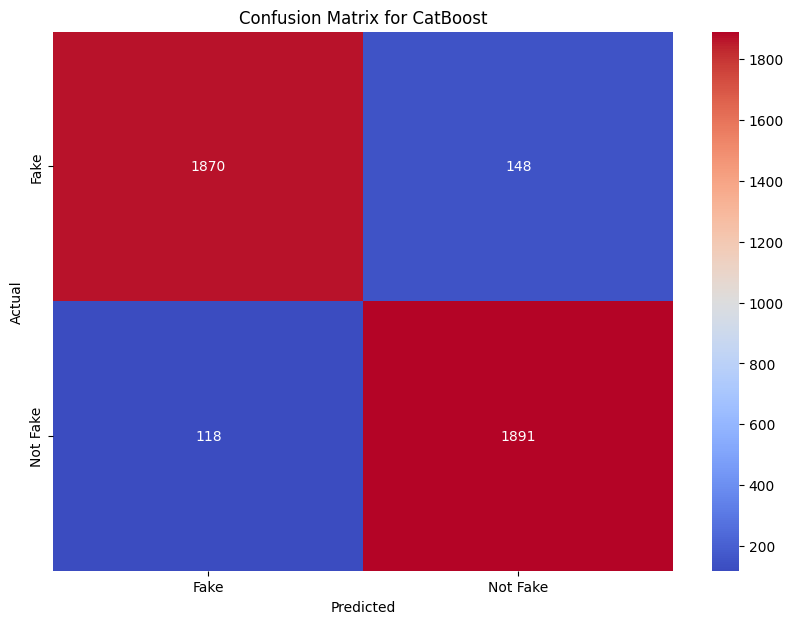

Classification Report for CatBoost:

              precision    recall  f1-score   support

        Fake       0.94      0.93      0.93      2018
    Not Fake       0.93      0.94      0.93      2009

    accuracy                           0.93      4027
   macro avg       0.93      0.93      0.93      4027
weighted avg       0.93      0.93      0.93      4027


------------------------------------------------------------



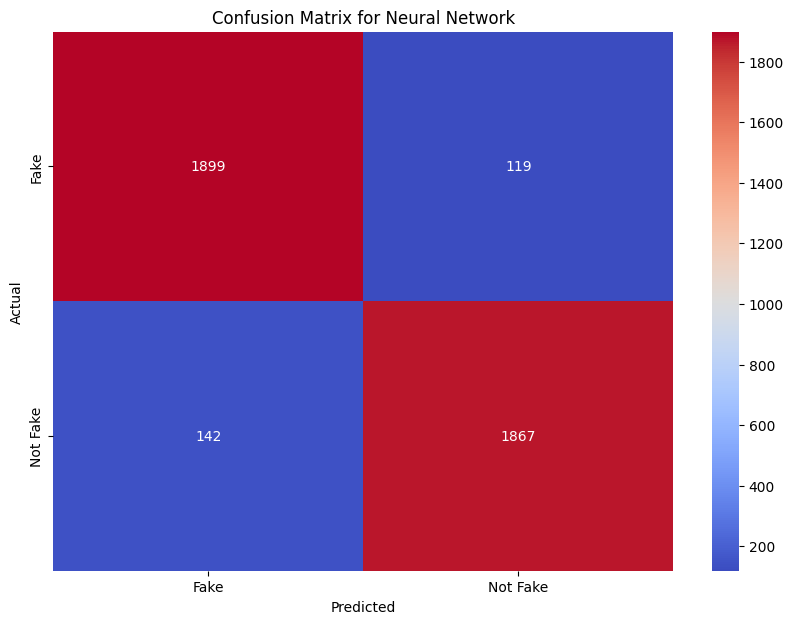

Classification Report for Neural Network:

              precision    recall  f1-score   support

        Fake       0.93      0.94      0.94      2018
    Not Fake       0.94      0.93      0.93      2009

    accuracy                           0.94      4027
   macro avg       0.94      0.94      0.94      4027
weighted avg       0.94      0.94      0.94      4027


------------------------------------------------------------



In [69]:
model_scores = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_scores.append((model_name, accuracy))

    # Confusion Matrix and Heatmap
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Fake', 'Not Fake'], yticklabels=['Fake', 'Not Fake'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    # Classification Report
    print(f'Classification Report for {model_name}:\n')
    print(classification_report(y_test, y_pred, target_names=['Fake', 'Not Fake']))
    print('\n' + '-'*60 + '\n')


## **Evaluation Metrics**

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Model scores
model_scores = [
    ('CatBoost', 0.933945),
    ('Gradient Boosting', 0.920039),
    ('Decision Tree', 0.870871),
    ('Logistic Regression', 0.941892),
    ('Random Forest', 0.922274),
    ('Neural Network', 0.935187)
]

# Create a DataFrame
models_df = pd.DataFrame(model_scores, columns=['Model', 'Score'])
models_df = models_df.sort_values(by='Score', ascending=False)

# Print the DataFrame
print(models_df)

                 Model     Score
3  Logistic Regression  0.941892
5       Neural Network  0.935187
0             CatBoost  0.933945
4        Random Forest  0.922274
1    Gradient Boosting  0.920039
2        Decision Tree  0.870871


## **Model Performance**

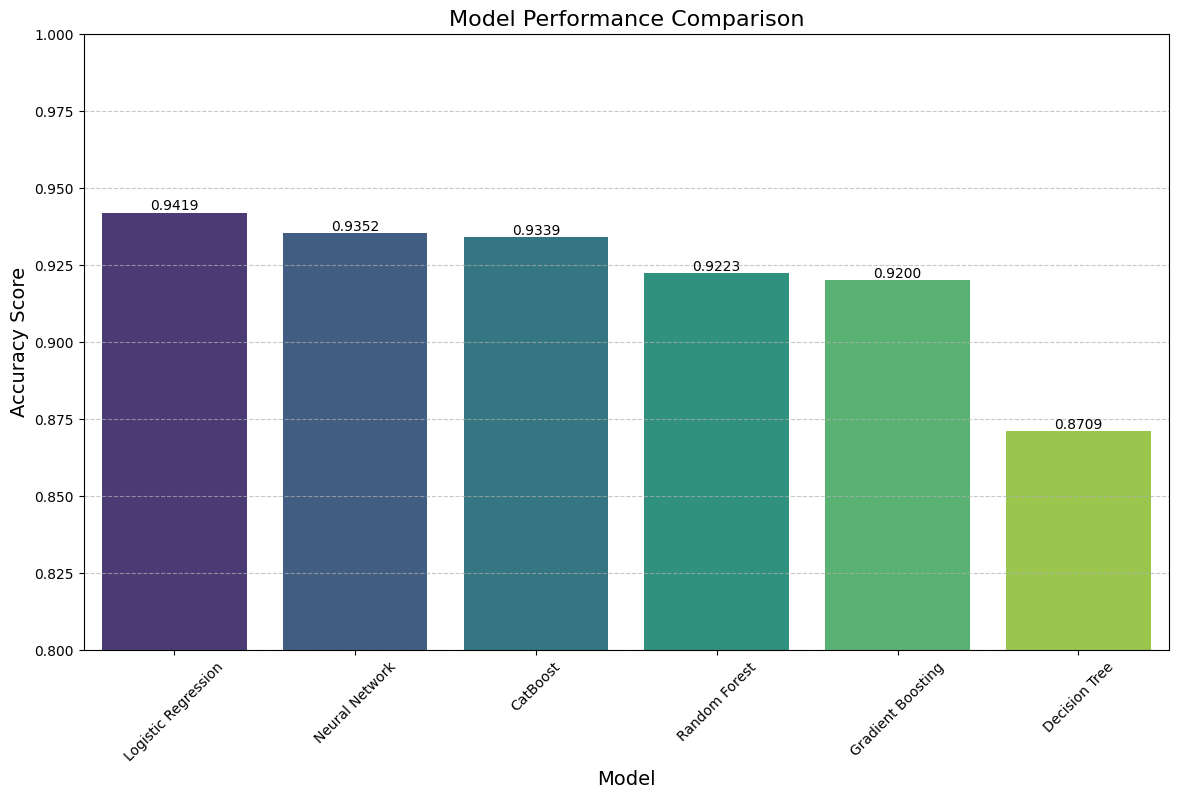

In [72]:
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x='Model', y='Score', data=models_df, palette='viridis')

for index, value in enumerate(models_df['Score']):
    plt.text(index, value, f'{value:.4f}', color='black', ha="center", va="bottom")

plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.ylim(0.80, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

## **Sentiment Analyzer For Best Model**

In [73]:
def sentiment_pred(classifier, vectorizer, doc):
    """function to predict the sentiment of a product review

       classifier : pre trained model
       vectorizer : matrix of features associated with the trained model
       doc = product review whose sentiment needs to be identified"""

    X_new = vectorizer.transform(pd.Series(doc)) #not using fit_transform here because the model is already fitted
    X_new = X_new.todense() #convert sparse matrix to dense
    X_new = np.asarray(X_new)
    print(X_new)

    from sklearn.feature_extraction.text import TfidfTransformer
    tfidf = TfidfTransformer() #by default applies "l2" normalization
    X_tfidf_new = tfidf.fit_transform(X_new)
    X_tfidf_new = X_tfidf_new.todense()
    X_tfidf_new = np.asarray(X_tfidf_new)
    print(X_tfidf_new)

    y_new = classifier.predict(X_tfidf_new)
    print(y_new)
    if y_new[0] == 0:
        return "negative sentiment"
    elif y_new[0] == 1:
        return "positive sentiment"

In [74]:
vectorizer = vectorizer
classifier = best_model
# Loop through all records in the 'text' column and calculate sentiment
news_df['predicted_sentiment'] = news_df['cleaned_text'].apply(lambda x: sentiment_pred(classifier, vectorizer, x))

Streaming output truncated to the last 5000 lines.
[[0. 0. 0. ... 0. 0. 0.]]
[0]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[1]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[0]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[0]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[1]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[1]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[1]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[0]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[0]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[0]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[0]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[1]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[0]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[1]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[0]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[1]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[1]
[[0. 0. 0. ... 0. 0. 0.

In [75]:
# Check the first few rows with predicted sentiment
print(news_df[['cleaned_text', 'predicted_sentiment']].head())

                                        cleaned_text predicted_sentiment
0  house dem aide didnt even see comeys letter ja...  positive sentiment
1  ever get feel life circle roundabout rather he...  positive sentiment
2  truth might get fire october tension intellige...  positive sentiment
3  video civilian kill single u airstrike identif...  positive sentiment
4  print iranian woman sentence six year prison i...  positive sentiment


### **Visualizations For Sentiment Analyzer**

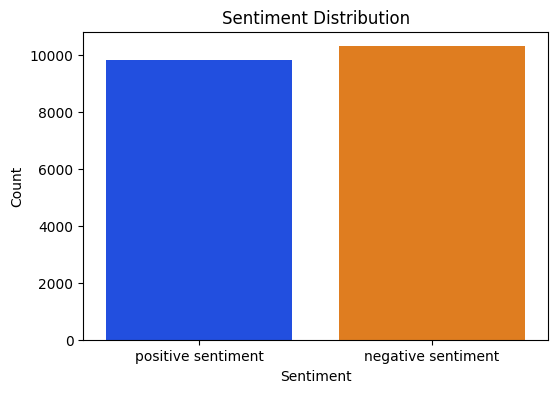

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 1. Sentiment Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=news_df['predicted_sentiment'], palette='bright')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

### **Word Cloud for Positive & Negative Sentiments**

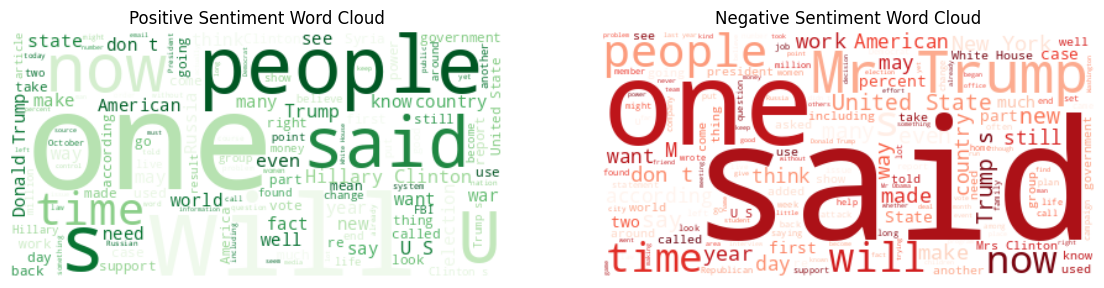

In [77]:
# 2. Word Cloud for Positive & Negative Sentiments
positive_text = " ".join(news_df[news_df['predicted_sentiment'] == "positive sentiment"]['text'])
negative_text = " ".join(news_df[news_df['predicted_sentiment'] == "negative sentiment"]['text'])

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

wordcloud_pos = WordCloud(colormap='Greens', background_color='white').generate(positive_text)
ax[0].imshow(wordcloud_pos, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title("Positive Sentiment Word Cloud")

wordcloud_neg = WordCloud(colormap='Reds', background_color='white').generate(negative_text)
ax[1].imshow(wordcloud_neg, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title("Negative Sentiment Word Cloud")

plt.show()

### Sentiment Word Cloud Analysis

#### 1. Positive Sentiment Word Cloud (Left, Green)
**Dominant Words:** `"one," "people," "will," "time," "world," "state," "election," "Trump," "Hillary Clinton."`

##### Observations:
- The words **“people,” “time,” and “will”** suggest discussions related to **future actions, collective experiences, or general political optimism**.
- Words like **“election,” “country,” “support,” and “American”** indicate that **positively classified articles** might focus on **national progress, unity, or political campaigns**.
- The presence of **“Donald Trump” and “Hillary Clinton”** suggests that **political figures** are often mentioned in a **positive sentiment context**, possibly in **support-based discussions**.

---

#### 2. Negative Sentiment Word Cloud (Right, Red)
**Dominant Words:** `"said," "one," "Mr. Trump," "time," "people," "work," "now," "year," "United States."`

##### Observations:
- The largest word **"said"** suggests that **negatively classified texts** rely heavily on **reported speech or quotes**, which might reflect **criticism, scandals, or negative news coverage**.
- **“Mr. Trump”** being a dominant phrase indicates that **articles mentioning him frequently might carry negative sentiment**.
- Words like **“work,” “now,” and “many”** may suggest topics around **economic struggles, dissatisfaction, or urgency**.
- **“United States”** being prominent hints at discussions on **national issues or policies with negative framing**.

---

#### Potential Implications:
- The **negative sentiment texts** seem to revolve around **reported speech, controversies, and urgency**, while **positive sentiment texts** emphasize **future actions, national identity, and political support**.
- The presence of **political figures in both** suggests that the dataset is **heavily political**, and **sentiment polarity** may be influenced by **reporting styles or framing biases**.
- Further analysis could reveal if **misinformation trends correlate with certain sentiment-laden terms**, especially in **discussions about political events**.

### **Analyzing TF-IDF outliers**

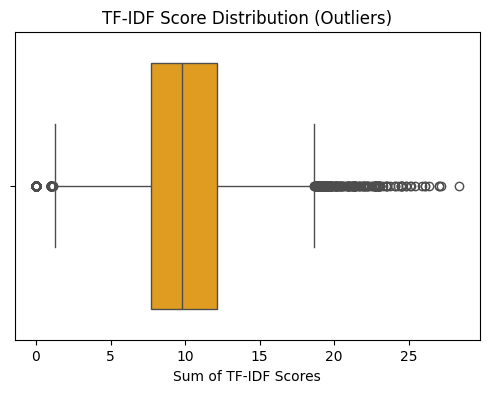

In [78]:
# Convert sparse matrix to dense for visualization
feature_matrix = vectorizer.transform(news_df['cleaned_text']).todense()
feature_sum = np.array(feature_matrix.sum(axis=1)).flatten()  # Sum of TF-IDF scores per document

plt.figure(figsize=(6, 4))
sns.boxplot(x=feature_sum, color='orange')
plt.title("TF-IDF Score Distribution (Outliers)")
plt.xlabel("Sum of TF-IDF Scores")
plt.show()


### **Interpretation Of Plot:**

**Box (Interquartile Range - IQR):** The orange box represents the middle 50% of the data (from Q1 to Q3). Most documents have their TF-IDF sum within this range.  

**Median Line:** The black line inside the box is the median, indicating the central tendency of the TF-IDF sum.  

**Whiskers:** The horizontal lines extending from the box show the range within 1.5 * IQR. Data points beyond this range are considered potential outliers.  

**Outliers:** The dots beyond the whiskers indicate documents with unusually high or low TF-IDF sums. This suggests that some documents have significantly different word distributions.  

A high number of outliers on the right side (higher TF-IDF sums) might indicate that some documents contain a large number of unique or highly weighted words, which could be worth investigating for bias in term frequency distributions.


### **Computing Z-scores**

In [79]:
from scipy.stats import zscore

z_scores = np.abs(zscore(feature_sum))  # Compute Z-scores
outliers = news_df[z_scores > 3]  # Flag reviews with Z-score > 3 (common threshold)

print("Potential Outliers (Unusual Text Features):")
print(outliers[['cleaned_text', 'predicted_sentiment']])


Potential Outliers (Unusual Text Features):
                                            cleaned_text predicted_sentiment
14     yes paid government troll social medium blog f...  positive sentiment
29     hillary clinton sat hideaway study ceremonial ...  positive sentiment
36     still danger zone january th th donald trump p...  positive sentiment
71     hillary america email server scrub obama trans...  positive sentiment
191    see late poll im beating hillary donald trump ...  negative sentiment
...                                                  ...                 ...
20281  lambert strether add thanks yves highly succes...  positive sentiment
20383  ever enfield never even heard living london gr...  negative sentiment
20468  monday jan less two week president trump inaug...  negative sentiment
20502  fall rise forgotten deplorables november polit...  positive sentiment
20596  vladimir putin take part final session valdai ...  positive sentiment

[96 rows x 2 columns]


### **Potential Outliers (Unusual Text Features)**  

Using the Z-score method, documents with a Z-score greater than 3 (indicating significantly different TF-IDF scores) were flagged as outliers. Above are some of the detected outliers:  


### **Interpretation of Outliers:**  
- **Outliers in TF-IDF Scores**: The listed texts have significantly different word distributions compared to the majority of the dataset. This could be due to excessive repetition of certain terms, a high number of unique words, or unusual document lengths.  
- **Sentiment Patterns**: The predicted sentiment of these outliers varies. It may be useful to investigate whether extreme TF-IDF values correlate with certain sentiment biases in your model.  
- **Contextual Anomalies**: Some of these texts might contain rare or overly frequent political terms, indicating possible misinformation trends, propaganda, or simply unique linguistic styles.  



### **Visualizing TF-IDF Scores vs. Sentiment**

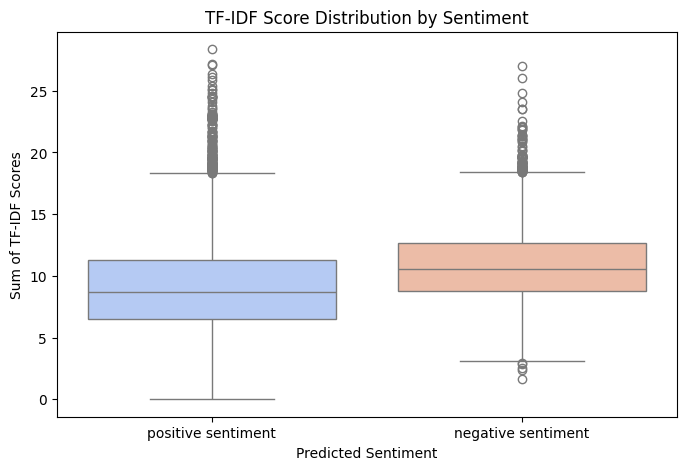

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add TF-IDF sums to the dataframe
news_df['tfidf_sum'] = feature_sum

# Plot the distribution of TF-IDF sums by sentiment
plt.figure(figsize=(8, 5))
sns.boxplot(x=news_df['predicted_sentiment'], y=news_df['tfidf_sum'], palette="coolwarm")
plt.title("TF-IDF Score Distribution by Sentiment")
plt.xlabel("Predicted Sentiment")
plt.ylabel("Sum of TF-IDF Scores")
plt.show()


### **Semantic Analysis of Anomalous Texts**

Using word embeddings (Word2Vec, BERT) to check if anomalous texts use political terms in unusual contexts.

In [98]:
from gensim.models import Word2Vec
# Prepare the sentences for Word2Vec
sentences = [text.split() for text in news_df['cleaned_text']]

# Initialize the Word2Vec model
word2vec_model = Word2Vec(vector_size=100, window=5, min_count=2, workers=4)

# Build the vocabulary from the sentences
word2vec_model.build_vocab(sentences)

# Train the Word2Vec model
word2vec_model.train(sentences, total_examples=word2vec_model.corpus_count, epochs=10)

# Find words most similar to "fake"
print("Words most similar to 'fake' (from news corpus):")
print(word2vec_model.wv.most_similar('fake', topn=10))


Words most similar to 'fake' (from news corpus):
[('fbits', 0.6430427432060242), ('bogus', 0.602782130241394), ('false', 0.5921835899353027), ('interleave', 0.5875256657600403), ('accentuates', 0.565252959728241), ('pambazuka', 0.5485198497772217), ('incessant', 0.5473195314407349), ('outlet', 0.5423982739448547), ('fabricate', 0.5394495725631714), ('buzzfeed', 0.5183600783348083)]


### **Fake vs Real News Detection using Cosine Similarity:**

In [104]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Assuming your DataFrame has 'cleaned_text' (text) and 'label' (sentiment/fake vs real)

# Extract the necessary text based on labels
fake_news = news_df[news_df['label'] == 0]['cleaned_text']
real_news = news_df[news_df['label'] == 1]['cleaned_text']

positive_sentiment = news_df[news_df['predicted_sentiment'] == 'positive sentiment']['cleaned_text']
negative_sentiment = news_df[news_df['predicted_sentiment'] == 'negative sentiment']['cleaned_text']

# Initialize and fit the TF-IDF Vectorizer on the entire cleaned text data
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)
vectorizer.fit(news_df['cleaned_text'])

# Vectorizing fake news and real news using the fitted vectorizer
fake_tfidf = vectorizer.transform(fake_news)
real_tfidf = vectorizer.transform(real_news)

# Vectorizing positive and negative sentiment using the same fitted vectorizer
positive_tfidf = vectorizer.transform(positive_sentiment)
negative_tfidf = vectorizer.transform(negative_sentiment)

# Compute cosine similarity between fake news and real news
cos_sim_fake_real = cosine_similarity(np.asarray(fake_tfidf.mean(axis=0)), np.asarray(real_tfidf.mean(axis=0)))

# Compute cosine similarity between positive and negative sentiment
cos_sim_pos_neg = cosine_similarity(np.asarray(positive_tfidf.mean(axis=0)), np.asarray(negative_tfidf.mean(axis=0)))

# Print the results
print(f"Cosine similarity between Fake and Real news: {cos_sim_fake_real[0][0]}")
print(f"Cosine similarity between Positive and Negative sentiment: {cos_sim_pos_neg[0][0]}")

Cosine similarity between Fake and Real news: 0.8139112532952245
Cosine similarity between Positive and Negative sentiment: 0.8012404270384239


### **Key Takeaways:**

#### Fake vs Real News:
- The high similarity score indicates that fake and real news articles in your dataset are likely using similar vocabulary and writing styles. This is typical because fake news often tries to imitate real news to be more convincing.

#### Positive vs Negative Sentiment:
- The moderate similarity indicates that while positive and negative sentiments are generally different, there are some common words or themes that occur in both sets. This is possibly due to shared vocabulary like adjectives, adverbs, or certain phrases.

## **Conclusion:**

This project focused on developing a machine-learning model to detect fake news on social platforms, using techniques such as TF-IDF vectorization, topic modeling, and cosine similarity to enhance the detection accuracy. The top-performing model was Logistic Regression (94.19%). Sentiment analysis helped identify subtle differences between positive and negative sentiment, revealing shared vocabulary that could be further refined.

The computational efficiency of the machine-learning models makes them suitable for resource-constrained environments, providing a scalable solution for fake news detection. The model’s potential applications include use by organizations like the Anti-Fake News Center for faster detection.